In [10]:
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv("../../data/AirPassengers.csv")
df['Month'] = pd.to_datetime(df['Month'])
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [8]:
import numpy as np

def create_sequences(data, timesteps):
    X = []
    y = []
    for i in range(len(data) - timesteps):
        # Ambil data sebanyak 'timesteps' sebagai input
        X.append(data[i:i + timesteps])
        # Target adalah data setelah timesteps
        y.append(data[i + timesteps])
    return np.array(X), np.array(y)

# Ambil kolom 'Passengers' sebagai data yang mau diproses
data = df['#Passengers'].values

# Tentukan jumlah timesteps (misalnya 12 bulan)
timesteps = 12

# Buat sekuens
X, y = create_sequences(data, timesteps)

print("Input shape (X):", X.shape)  # Harusnya (n_samples, timesteps)
print("Target shape (y):", y.shape)  # Harusnya (n_samples,)


Input shape (X): (132, 12)
Target shape (y): (132,)


Epoch 1/200


d:\cursor_code\python\Lstm\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 52769.2383
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 54278.8516 
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31600.9023 
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11582.9854 
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5020.3843 
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2225.1987 
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1385.6893 
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 994.3862 
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 786.4609 
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 565.4471 
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 575.6528 
Epoch 12/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 486.9582 
Epoch 13/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 460.9468 
Epoch 14/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 398.1414 
Epoch 15/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3

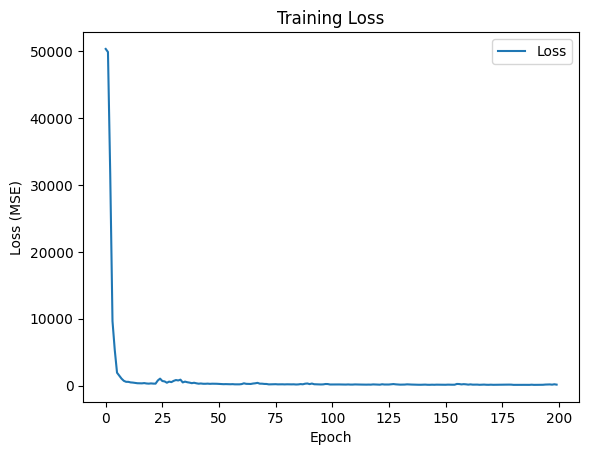

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Bangun model LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(timesteps, 1)))
model.add(Dense(1))

# Kompilasi model
model.compile(optimizer='adam', loss='mse')

# Latih model
history = model.fit(X, y, epochs=200, verbose=1)

# Plot loss selama training
plt.plot(history.history['loss'], label='Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error (MSE): 129.7781953494352


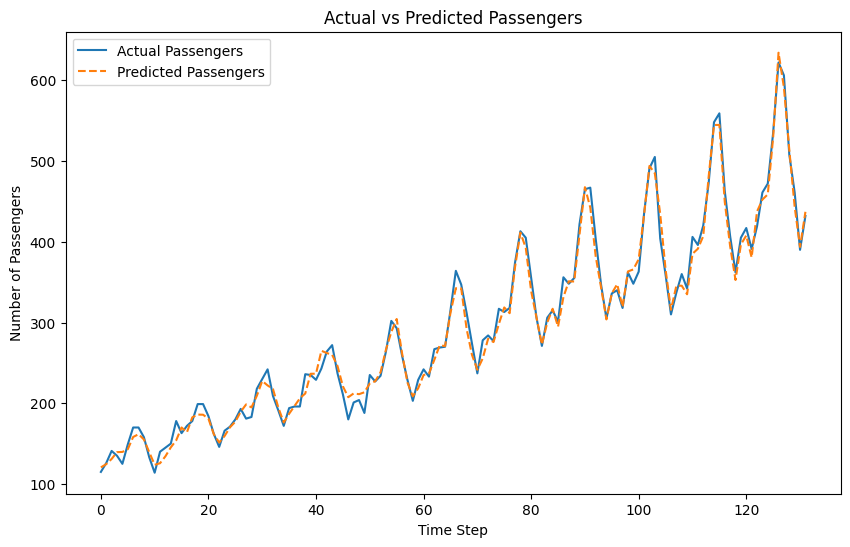

In [13]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(X)

# Evaluasi model dengan MSE (Mean Squared Error)
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error (MSE): {mse}')

# Plot hasil prediksi vs data asli
plt.figure(figsize=(10, 6))
plt.plot(y, label='Actual Passengers')
plt.plot(predictions, label='Predicted Passengers', linestyle='dashed')
plt.title('Actual vs Predicted Passengers')
plt.xlabel('Time Step')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()